## Load the required modules ##

In [32]:
from sklearn.datasets import fetch_mldata
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

## Load the data ##


In [2]:
car_data_url ='https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
car_data = pd.read_csv(car_data_url)

## Assign the coloumns ##

In [3]:
car_data.columns = ["buying", "maint", "doors", "persons","lug_boot", "safety","acceptance_result"]

In [4]:

from sklearn.metrics import accuracy_score
from sklearn import preprocessing



## data encoding ##

In [5]:
le = preprocessing.LabelEncoder()
car_data = car_data.apply(le.fit_transform)


## Extarct X and Y ##

In [6]:
x_data = car_data.iloc[:, 0:6]
y_data = car_data.iloc[:, 6:7]


## Graphs and Visuals ##

In [7]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(car_data)

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


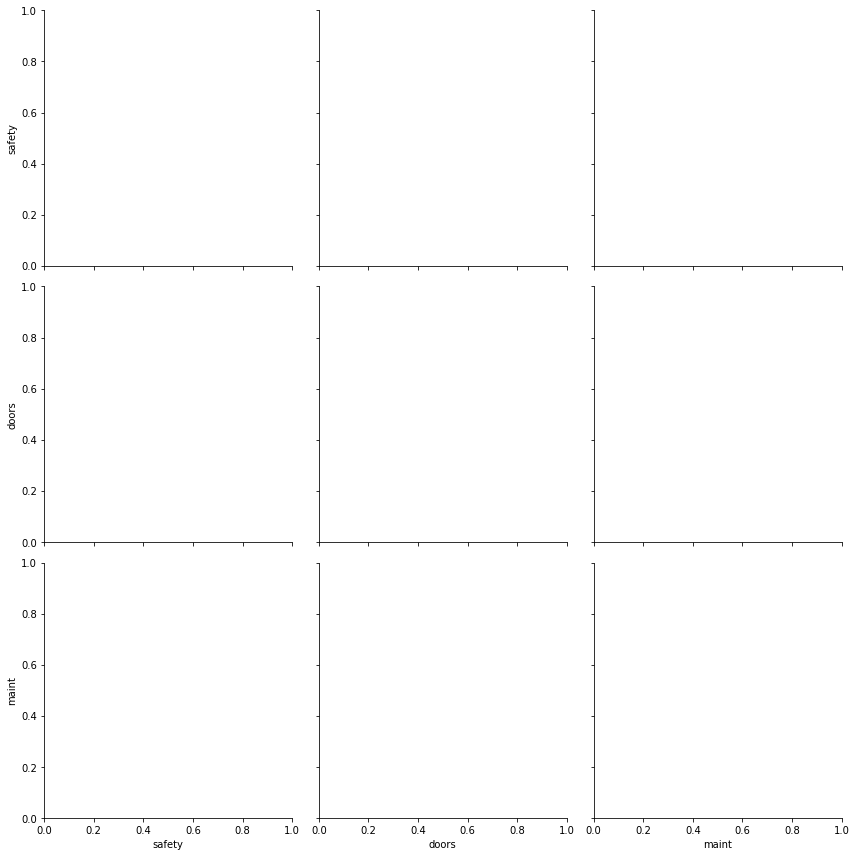

In [8]:
# Create an instance of the PairGrid class.
grid = sns.PairGrid(data= car_data[car_data['buying'] == 1],
                    vars = ['safety', 'doors', 
                    'maint'], size = 4)

In [9]:
from pandas.plotting import parallel_coordinates

In [10]:
def scatterplot(x_data, y_data, x_label="", y_label="", title="", color = "r", yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

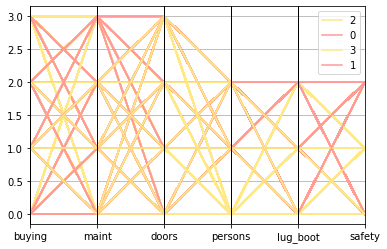

In [11]:
pc = parallel_coordinates(car_data, 'acceptance_result', color=('#FFE888', '#FF9999'))


## Splitting Training And Test Data ##


In [12]:
X_train, X_test, y_train, y_test = train_test_split( x_data, y_data, test_size= 0.2, random_state = 100)

## Logistic Model building ##

In [13]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
model = LogisticRegression(multi_class='auto', solver='lbfgs')
model.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
X_test

array([[ 1.35188468,  1.33320254, -0.43880149, -1.23410886,  1.22173843,
         1.22208848],
       [-0.44585508, -1.34939004,  0.44973935,  1.21636466,  0.00703665,
        -1.22563333],
       [-0.44585508, -0.45519251, -1.32734232,  1.21636466,  1.22173843,
        -0.00177243],
       ...,
       [-1.34472496, -1.34939004,  1.33828019,  1.21636466,  0.00703665,
         1.22208848],
       [ 0.4530148 , -1.34939004, -1.32734232, -1.23410886,  1.22173843,
        -1.22563333],
       [-0.44585508,  0.43900501, -0.43880149, -0.0088721 , -1.20766513,
         1.22208848]])

In [17]:
# use the model to make predictions with the test data

y_pred = model.predict(X_test)

In [18]:
#count_misclassified = (y_test[0] != y_pred[0]).sum()
accuracy_score(y_test, y_pred)

0.6791907514450867

## Accuracy :0.6791907514450867 ##

## Confusion matrix ##

In [31]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[ 12   0  58   4]
 [  4   0  11   0]
 [ 23   0 221   1]
 [  5   0   5   2]]


## Decision Boundary And Training and Test results  ##

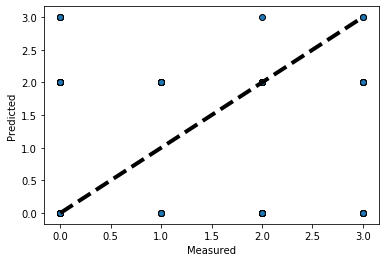

In [22]:
from sklearn.model_selection import cross_val_predict

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


##Predict and display the class label of a car with following attributes : buying, maint, doors, persons, lug_boot, safety as [vhigh,low,4,more,small,med] ##

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
# new instances where we do not know the answer
Xnew, _ = make_blobs(buying='vhigh', maint='low', doors=4, persons='more',lug_boot='small',safety='med')
# make a prediction
ynew = model.predict(Xnew)